# SCRATCH PAD

The only purpose for this notebook is to house all of my random 'stuff' like code chunks, thoughts/comments, ideas etc.  No fancy formatting etc, just a paste pad that I can keep with ideas and other such things in raw form. Its like running commentary for my brain sometimes.

I am pretty happy with where the project is at this point in time in comparison to the total amount of time I have before the end of the project.
We are at the end of module 2, and we still have modules 3 and 4 to got.  I have so much time to continue exploring and visualing data, i'm really diggin this pathway.

At the end of the day, the way my brain thinks about this project is that is just one big research project where I get to use real world data and various tools and utilities to deep dive on something I find interesting.  This has been alot of fun!

Thanks to having to learn markdown for the bazillion readmes ive had to make, up to this point, for the 3 - 4 pathway/workshops ive taken, markdown has become infinitely more useful with jupiter notebooks.  Markdown cells truely are superior to code comments both in quality and the level of readibility they provide. It's little readme chunkies whenever i want them. It's almost stupid how full circle thats come, from being forced to make readmes for 4 capstone projects now and hating every second of it, to actually being greatful for the ability to use it through-out my notebook.

In [5]:
# all imports i may need for various code blocks
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

Basic geopanda example to make sure we got everything installed in the virtual environment etc.

SUCCESS: Modern GeoJSON map loaded.


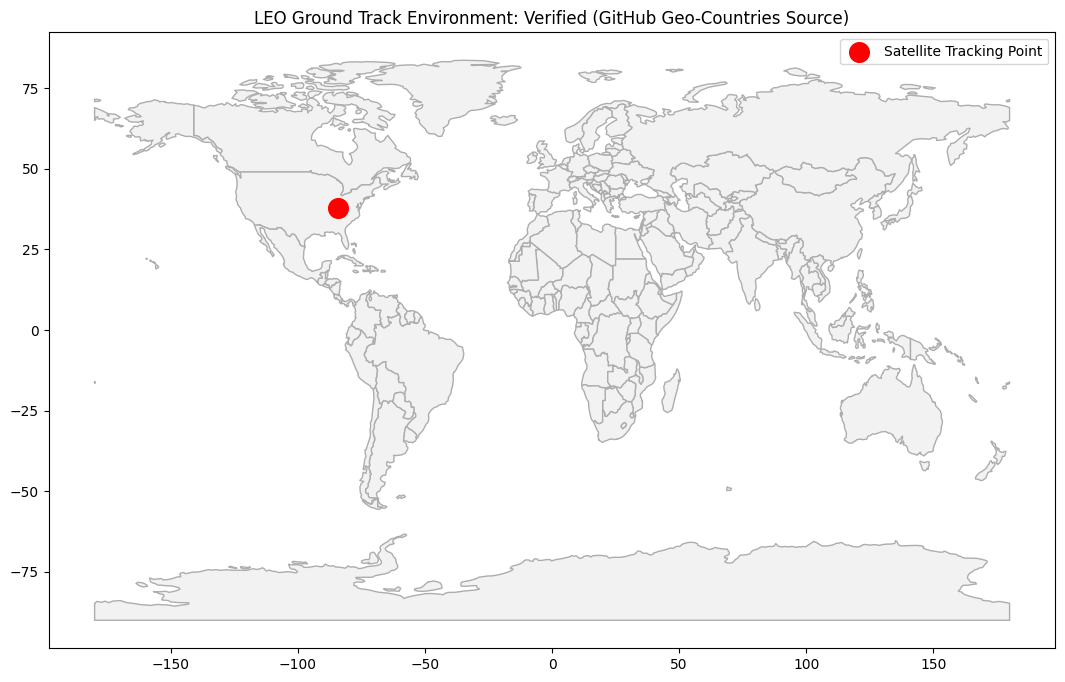

In [6]:
# 1. Load the countries.geojson
try:
    world = gpd.read_file('../data/original/countries.geojson')
    print("SUCCESS: Modern GeoJSON map loaded.")
except FileNotFoundError:
    print("ERROR: Check your 'data/original/' folder. Is the file named 'countries.geojson'?")

# 2. Setup your project test data
data = {
    'Satellite_ID': ['Test_Point_KY'],
    'Lat': [37.99],
    'Lon': [-84.17]
}
df = pd.DataFrame(data)

# 3. Create the GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=[Point(xy) for xy in zip(df['Lon'], df['Lat'])], 
    crs="EPSG:4326"
)

# 4. Final Visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the new GitHub countries data
world.plot(ax=ax, color='#f2f2f2', edgecolor='#adadad')

# Plot your test point
gdf.plot(ax=ax, color='red', markersize=200, label='Satellite Tracking Point')

plt.title("LEO Ground Track Environment: Verified (GitHub Geo-Countries Source)")
plt.legend()
plt.show()

# REORGANIZE

* I seem to have a few cleanup steps and maybe some data augmentation in my eda book(s) that may be better left in the cleanup notebook. 
* Considering strickly cleaning satcat.csv and saving a cleaned version of that, and then creating a 3rd notebook speecifically for the csv created by merging my 2 datasets.  This should allow me to maintain the integrity of the original data after cleaning that is ready to be used to create a polished dataset. The 3rd notebook would contain the merging and subsuquent cleaning/augmentation steps for the final polished dataset for the merged data.